In [9]:
%reset -f

In [10]:
import graphviz
import ipywidgets as widgets
from IPython.display import display

In [11]:
#ConditionalBond
class CB:
    def __init__(self, condition="?", node="?"):
        self.condition = condition
        self.node = node

#TreeNode
class TN:
    def __init__(self, name="?", children=[], parents=[]):
        self.name = name
        self.children = children
        for child in self.children:
            child.node.parents.append(self)
        self.parents = parents
            
    def BranchRender(self):
        f = graphviz.Digraph()
        f.attr(rankdir='LR', size='16')
        f.attr('node', shape='rect')
        visited = []
        stack = []
        stack.append(self)
        while len(stack) > 0:
            node = stack.pop()
            if node in visited:
                continue
            visited.append(node)
            for child in node.children:
                stack.append(child.node)
                f.edge(node.name, child.node.name, label=child.condition)
            for parent in node.parents:
                stack.append(parent)
        for node in visited:
            if len(node.children) == 0:
                f.node(node.name, shape="underline")
        display(f)
            
    def Render(self):
        f = graphviz.Digraph()
        f.attr(rankdir='TB', size='16')
        f.attr('node', shape='hexagon')
        f.node(self.name)
        f.attr('node', shape='rect')
        for child in self.children:
            f.edge(self.name, child.node.name, child.condition)
        for parent in self.parents:
            for node in parent.children:
                if node.node == self:
                    condition = node.condition
                    break
            f.edge(parent.name, self.name, condition)
        display(f)
        
    def GetNeighborByCondition(self, condition):
        match = self
        for child in self.children:
            if child.condition == condition:
                match = child.node
                break
        if match == self:
            for parent in self.parents:
                for node in parent.children:
                    if node.condition == condition:
                        match = parent
                        break
        return match
    
    def GetNeighborByName(self, name):
        match = self
        for child in self.children:
            if child.node.name == name:
                match = child.node
                break
        if match == self:
            for parent in self.parents:
                if parent.name == name:
                    match = parent
                    break
        return match
    
    def Traverse(self, direction=""):
        new_node = self.GetNeighborByCondition(direction)
        if new_node == self:
            new_node = self.GetNeighborByName(direction)
        new_node.Render()
        return new_node
    
    def FindNodeByName(self, name):
        visited = []
        stack = []
        stack.append(self)
        while len(stack) > 0:
            node = stack.pop()
            if node in visited:
                continue
            if node.name == name:
                return node
            visited.append(node)
            for child in node.children:
                stack.append(child.node)
            for parent in node.parents:
                stack.append(parent)
        return "EMPTY"
    
    def SetParentNode(self, parent, condition):
        self.parents.append(parent)
        parent.children.append(CB(condition, self))
        return self
    
    def SetChildNode(self, condition, child):
        self.children.append(CB(condition, child))
        child.parents.append(self)
        return self
    
    def PatternSearch(self, term1, term2):
        pattern_match = []
        match1 = self.FindNodeByName(term1)
        temp = ""
        for parent in match1.parents:
            is_a_pattern1 = False
            is_a_pattern2 = False
            for child in parent.children:
                if child.node.name == term1:
                    temp = parent.name + " " + child.condition + " " + child.node.name
                    is_a_pattern1 = True
            for child in parent.children:
                if child.node.name == term2:
                    temp += " і " + child.condition + " " + child.node.name
                    is_a_pattern2 = True
            if (is_a_pattern1 == True) and (is_a_pattern2 == True):
                pattern_match.append(temp)
                temp = ""
        for line in pattern_match:
            display(line)
            

In [12]:
#TN("name", [ CB("condition", <child 0x###>) ], [])
#TN("", [ CB("", <#>) ])
#TN("", [])
# = TN("")

Обладнання = TN("Обладнання",[],[])
Електродинамічний = TN("Електродинамічний",[],[])
Інструмент = TN("Інструмент",[],[])
Комутація = TN("Комутація",[],[])
Струнний = TN("Струнний",[],[])
Транзисторний = TN("Транзисторний",[],[])
Ударний = TN("Ударний",[],[])

Мультикор = TN("Мультикор",[],[])
PatchBay = TN("PatchBay",[],[])
МікшернийПульт = TN("МікшернийПульт",[],[])
Гітара = TN("Гітара",[],[])
Скрипка = TN("Скрипка",[],[])
Перкусія = TN("Перкусія",[],[])
Барабан = TN("Барабан",[],[])
Динамік = TN("Динамік",[],[])
Мікрофон = TN("Мікрофон",[],[])
Синтезатор = TN("Синтезатор",[],[])
СигнальнийПроцесор = TN("СигнальнийПроцесор",[],[])
ПідсилювачПотужності = TN("ПідсилювачПотужності",[],[])
АудіоІнтерфейс = TN("АудіоІнтерфейс",[],[])
УдарнийМодуль = TN("УдарнийМодуль",[],[])
ДрамМашина = TN("ДрамМашина",[],[])

In [13]:
Мультикор.SetChildNode("Тип", Комутація).SetChildNode("Це", Обладнання)
PatchBay.SetChildNode("Тип", Комутація).SetChildNode("Це", Обладнання)
МікшернийПульт.SetChildNode("Тип", Комутація).SetChildNode("Тип", Транзисторний).SetChildNode("Це", Обладнання)
Гітара.SetChildNode("Тип", Струнний).SetChildNode("Це", Інструмент)
Скрипка.SetChildNode("Тип", Струнний).SetChildNode("Це", Інструмент)
Перкусія.SetChildNode("Тип", Ударний).SetChildNode("Це", Інструмент)
Барабан.SetChildNode("Тип", Ударний).SetChildNode("Це", Інструмент)
Динамік.SetChildNode("Тип", Електродинамічний).SetChildNode("Це", Обладнання)
Мікрофон.SetChildNode("Тип", Електродинамічний).SetChildNode("Це", Інструмент)
Синтезатор.SetChildNode("Тип", Транзисторний).SetChildNode("Тип", Електродинамічний).SetChildNode("Це", Інструмент)
СигнальнийПроцесор.SetChildNode("Тип", Транзисторний).SetChildNode("Це", Обладнання)
ПідсилювачПотужності.SetChildNode("Тип", Транзисторний).SetChildNode("Тип", Електродинамічний).SetChildNode("Це", Обладнання)
АудіоІнтерфейс.SetChildNode("Тип", Транзисторний).SetChildNode("Це", Обладнання)
УдарнийМодуль.SetChildNode("Тип", Транзисторний).SetChildNode("Це", Інструмент)
ДрамМашина.SetChildNode("Тип", Транзисторний).SetChildNode("Це", Інструмент)

'Мікрофон Тип Електродинамічний і Це Інструмент'

'Синтезатор Тип Електродинамічний і Це Інструмент'

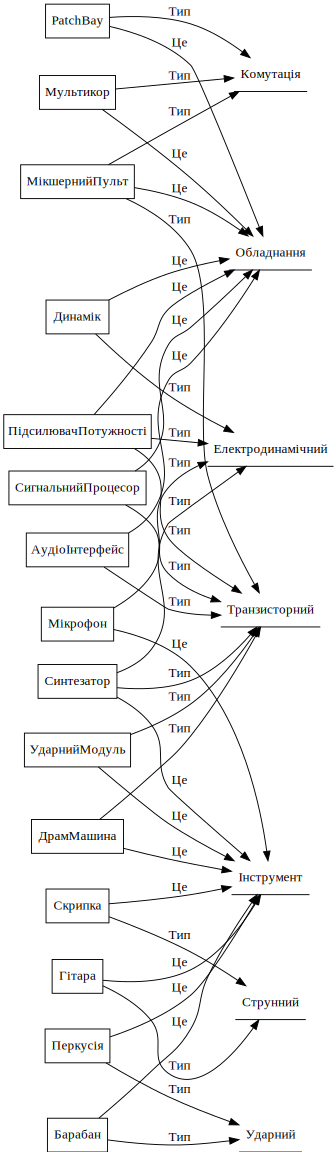

In [15]:
Обладнання.PatternSearch("Електродинамічний", "Інструмент")
Обладнання.BranchRender()

In [17]:
#btn = widgets.Button(description='Traverse')
#fld = widgets.Text()
#widgets.HBox([fld, btn])
cur_node = Обладнання

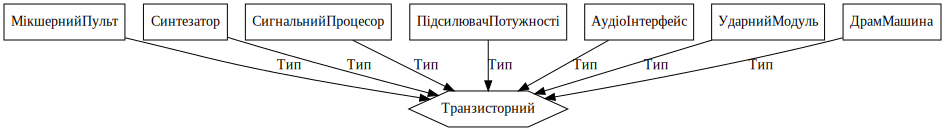

In [21]:
cur_node = cur_node.Traverse("Тип")